In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

# Завантаження усіх даних

Завантажемо усі дані для того, щоб зробити певні висновки про структуру отриманого датасета

In [2]:
demo_path = 'Demo/'

In [3]:
list_file_paths = os.listdir(demo_path)

In [4]:
data = np.vstack((np.loadtxt(demo_path + file_path, delimiter=',', dtype=np.object) for file_path in list_file_paths))

In [5]:
df = pd.DataFrame(data)

Порахуємо кулькість унікальних значень в кожному стовбці і спробуємо зрозуміти які типи мають наші ознаки 

In [6]:
print('Розмірність набору даних - {}'.format(df.shape))
for i in df:
    print('{} стовбець має {} унікальних значень'.format(i, np.unique(df[i]).shape[0]))

Розмірність набору даних - (59440, 3)
0 стовбець має 13067 унікальних значень
1 стовбець має 18146 унікальних значень
2 стовбець має 19 унікальних значень


Перші дві ознаки можуть бути числовими третя скоріш всього категоріальна. Перевіримо це припущення шляхом зміни типу серії на числовий.

In [7]:
try:
    for i in df:
        df[i] = df[i].astype(np.float32)
except ValueError:
    print("У {} стовбці тип змінено не було".format(i+1)) # І ну наступних

У 3 стовбці тип змінено не було


In [8]:
df.dtypes

0    float32
1    float32
2     object
dtype: object

In [9]:
df[[0, 1]].agg([np.min, np.max, np.std])

,0,1
amin,-2268850.0,-1738313.000
amax,9655840.0,7774284.000
std,2607186.5,1694594.125


Окільки перші дві ознаки без проблем перевелись в числовий тип і мають занадто багато значень, якщо рахувати відносно кількості усіх даних то вони числові

Окільки третій стовбчик має не настільки багато можливих значень подивимось на нього детальніше

In [10]:
df[2].value_counts(normalize=True)

1           0.556107
17          0.141235
9           0.125707
25          0.062954
5           0.060279
13          0.039653
24-52       0.004862
24-58       0.003651
24-53       0.002439
24-5        0.001430
24-57       0.000673
24-59       0.000370
19          0.000286
24-51       0.000135
2           0.000084
24-15       0.000050
24--4111    0.000034
23          0.000034
24-4        0.000017
Name: 2, dtype: float64

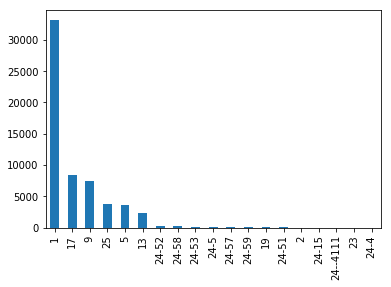

In [11]:
df[2].value_counts().plot('bar');

Не відомо як інтерпретувати дані типу "24-Х". Оскільки ці випадки зустрічаються не так часто то обріжемо "-" і все що пісял нього.

In [12]:
df[2] = df[2].str.split('-', expand=True)[0]

In [13]:
df[2].value_counts(normalize=True)

1     0.556107
17    0.141235
9     0.125707
25    0.062954
5     0.060279
13    0.039653
24    0.013661
19    0.000286
2     0.000084
23    0.000034
Name: 2, dtype: float64

In [14]:
df = df.astype(float)

Після цієї зміни кожне значення в датасеті стало числовим

Оскільки датасет має лиш три виміра то його можна зручно намалювати

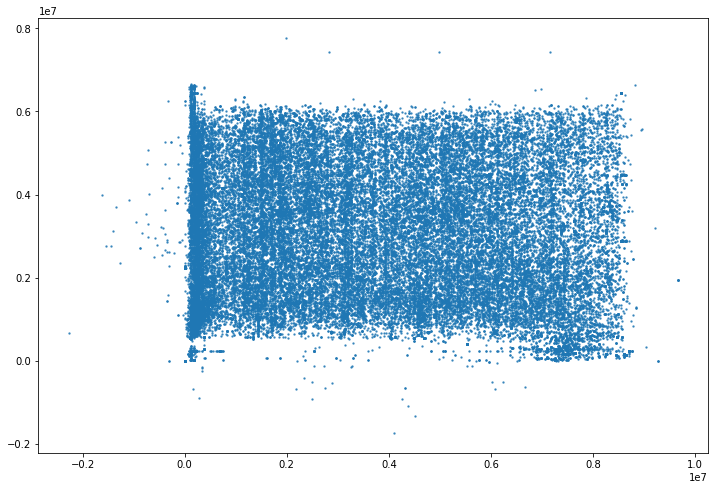

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(df[0], df[1], s=2, alpha=0.7);

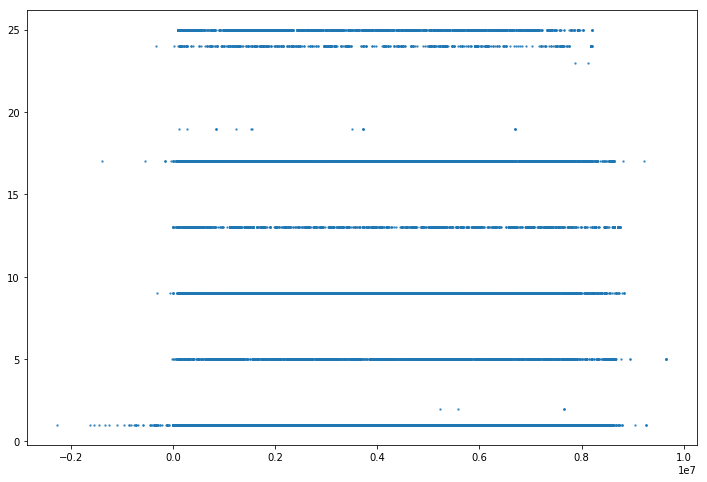

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(df[0], df[2], s=2, alpha=0.7);

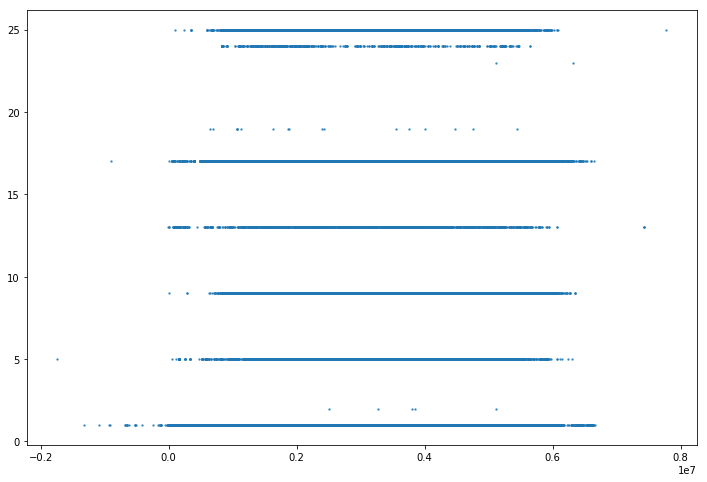

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(df[1], df[2], s=2, alpha=0.7);

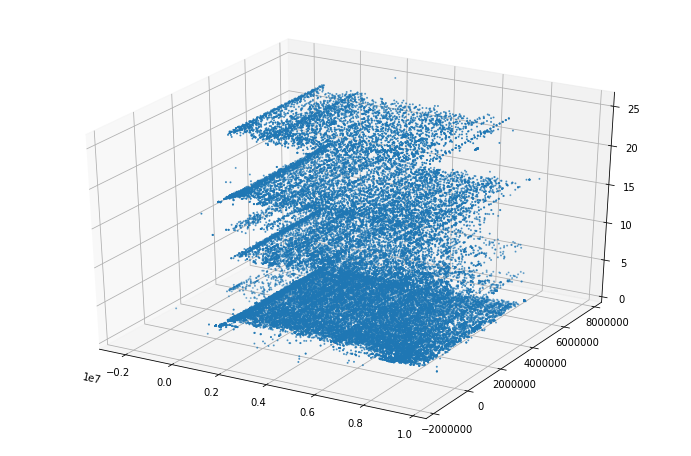

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = df[0], df[1], df[2]
ax.scatter(X, Y, Z, s=1);

Дивлячись на на проекції цих даних на різні вісі можна зробити припущення що кількість кластерів буде від 6 до 10.

Збережемо отриманий набір даних в зручному форматі

In [19]:
df.to_csv('demo.csv')